In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
from sklearn.linear_model import LogisticRegression

In [95]:
pd.describe_option('display.max_rows',None)
des=pd.read_csv(r'dataset_column_description.csv')
des

,Column Name,Description
0,Gender,"The gender of the individual (e.g., Male, Fema..."
1,Age,The age of the individual in years.
2,Academic Pressure,A numeric score indicating the level of academ...
3,Study Satisfaction,A numeric score representing how satisfied the...
4,Sleep Duration,"The amount of sleep the individual gets, categ..."
5,Dietary Habits,The individual's eating habits categorized as ...
6,Have you ever had suicidal thoughts?,Indicates whether the individual has had suici...
7,Study Hours,The number of hours the individual spends stud...
8,Financial Stress,A numeric score indicating the level of financ...
9,Family History of Mental Illness,Indicates if the individual has a family histo...


In [96]:
df=pd.read_csv('Depression Student Dataset.csv')


# **Data Exploration**

In [97]:
df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [98]:
df.tail()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
497,Male,26,5.0,2.0,More than 8 hours,Unhealthy,No,8,3,No,Yes
498,Male,24,2.0,1.0,Less than 5 hours,Unhealthy,Yes,8,5,No,Yes
499,Female,23,3.0,5.0,5-6 hours,Healthy,No,1,5,Yes,No
500,Male,33,4.0,4.0,More than 8 hours,Healthy,No,8,1,Yes,No
501,Male,18,5.0,3.0,More than 8 hours,Unhealthy,No,6,2,Yes,Yes


In [99]:
df.sample(4)

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
462,Female,19,1.0,2.0,More than 8 hours,Healthy,No,7,5,No,No
329,Female,28,2.0,4.0,5-6 hours,Healthy,No,10,5,Yes,No
427,Female,22,5.0,2.0,7-8 hours,Moderate,Yes,5,1,Yes,Yes
165,Male,24,2.0,5.0,7-8 hours,Unhealthy,Yes,5,4,No,Yes


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [101]:
df.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [102]:
df['Academic Pressure'].value_counts()

Academic Pressure
3.0    125
1.0     99
5.0     98
4.0     92
2.0     88
Name: count, dtype: int64

In [103]:
df['Dietary Habits'].value_counts()

Dietary Habits
Moderate     172
Unhealthy    169
Healthy      161
Name: count, dtype: int64

In [104]:
df['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    260
No     242
Name: count, dtype: int64

In [105]:
df['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     265
Yes    237
Name: count, dtype: int64

<Axes: xlabel='Study Hours', ylabel='Depression'>

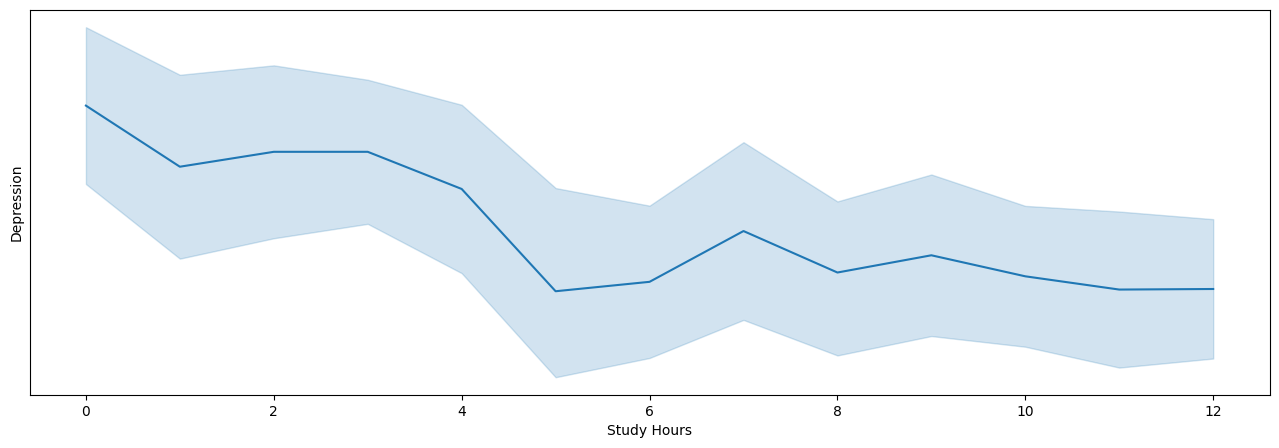

In [106]:
plt.figure(figsize=(16,5))
sns.lineplot(x=df['Study Hours'],y=df['Depression'])

<Axes: xlabel='Age', ylabel='Depression'>

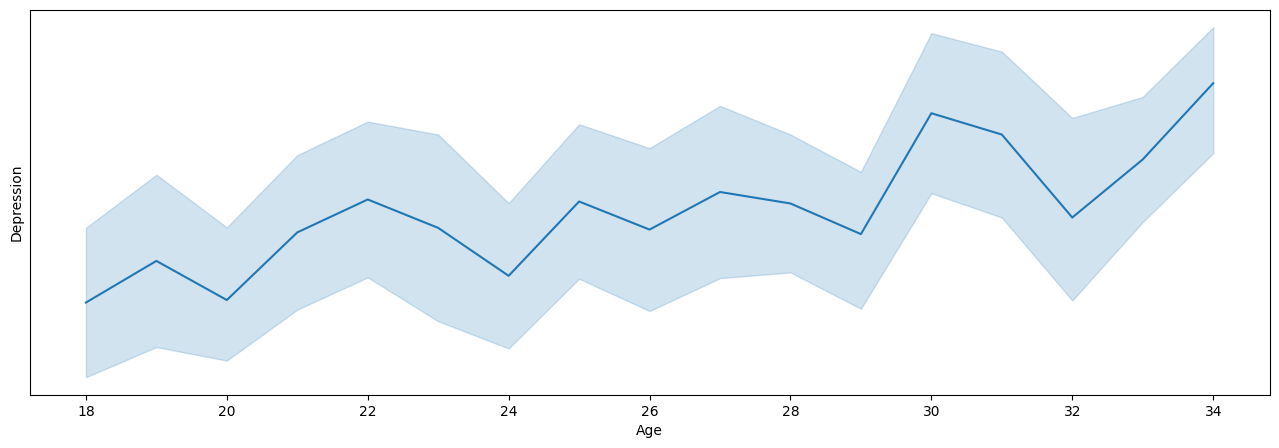

In [107]:
plt.figure(figsize=(16,5))
sns.lineplot(x=df['Age'],y=df['Depression'])

# Data Wrangling: 
  - Cleaning & Outliers
  - Preparation & Tranformation


In [108]:
df.isna().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [109]:
df.duplicated().sum()

np.int64(0)

<Axes: >

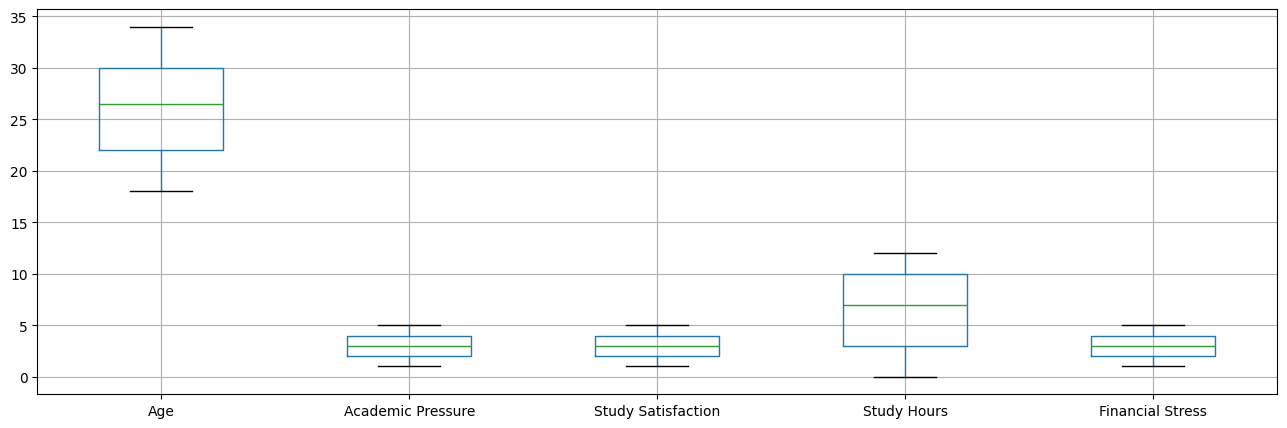

In [110]:
plt.figure(figsize=(16,5))
df.boxplot()

In [111]:
df.dtypes

Gender                                    object
Age                                        int64
Academic Pressure                        float64
Study Satisfaction                       float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Study Hours                                int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object

In [112]:
Ecoder=LabelEncoder()
df['Gender']=Ecoder.fit_transform(df['Gender'])
df['Depression']=Ecoder.fit_transform(df['Depression'])
df['Dietary Habits']=Ecoder.fit_transform(df['Dietary Habits'])
df['Family History of Mental Illness']=Ecoder.fit_transform(df['Family History of Mental Illness'])
df['Have you ever had suicidal thoughts ?']=Ecoder.fit_transform(df['Have you ever had suicidal thoughts ?'])

In [113]:
df['Sleep Duration'].value_counts()

Sleep Duration
7-8 hours            128
More than 8 hours    128
5-6 hours            123
Less than 5 hours    123
Name: count, dtype: int64

In [114]:
sleep_duration_numeric_mapping = {
    '7-8 hours': (7, 8),            # Range as (start, end)
    '5-6 hours': (5, 6),            # Range as (start, end)
    'More than 8 hours': (8.01, 24), # Open-ended range (>8.2)
    'Less than 5 hours': (0, 4)     # Open-ended range (<5)
}

df['Sleep Duration'] = df['Sleep Duration'].map(sleep_duration_numeric_mapping)


# Access individual elements (if needed)
df['Sleep Duration Start'] = df['Sleep Duration'].map(lambda x: x[0])  
df['Sleep Duration End'] = df['Sleep Duration'].map(lambda x: x[1])    



In [115]:
df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration Start,Sleep Duration End
0,1,28,2.0,4.0,"(7, 8)",1,1,9,2,1,0,7.00,8
1,1,28,4.0,5.0,"(5, 6)",0,1,7,1,1,0,5.00,6
2,1,25,1.0,3.0,"(5, 6)",2,1,10,4,0,1,5.00,6
3,1,23,1.0,4.0,"(8.01, 24)",2,1,7,2,1,0,8.01,24
4,0,31,1.0,5.0,"(8.01, 24)",0,1,4,2,1,0,8.01,24


# Feature Engineering
 - Selection
 - Scaling

In [116]:
df.corr(numeric_only=True)['Depression']

Gender                                   0.031683
Age                                     -0.215625
Academic Pressure                        0.476259
Study Satisfaction                      -0.293484
Dietary Habits                           0.186685
Have you ever had suicidal thoughts ?    0.466296
Study Hours                              0.200441
Financial Stress                         0.296846
Family History of Mental Illness         0.056087
Depression                               1.000000
Sleep Duration Start                    -0.035794
Sleep Duration End                      -0.064869
Name: Depression, dtype: float64

In [117]:

correlation_with_target = {
    "Gender": 0.031683,
    "Age": -0.215625,
    "Academic Pressure": 0.476259,
    "Study Satisfaction": -0.293484,
    "Dietary Habits": 0.186685,
    "Have you ever had suicidal thoughts ?": 0.466296,
    "Study Hours": 0.200441,
    "Financial Stress": 0.296846,
    "Family History of Mental Illness": 0.056087,
    "Depression": 1.000000,
    "Sleep Duration Start": -0.035794,
    "Sleep Duration End": -0.064869
}

correlation_series = pd.Series(correlation_with_target)

threshold = 0.15  

features_to_keep = correlation_series[correlation_series.abs() >= threshold].index.tolist()

df_filtered = df[features_to_keep]



In [118]:
df_filtered.corr()['Depression']

Age                                     -0.215625
Academic Pressure                        0.476259
Study Satisfaction                      -0.293484
Dietary Habits                           0.186685
Have you ever had suicidal thoughts ?    0.466296
Study Hours                              0.200441
Financial Stress                         0.296846
Depression                               1.000000
Name: Depression, dtype: float64

In [119]:
df_filtered.sample(4)

,Age,Academic Pressure,Study Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Depression
46,31,1.0,3.0,0,0,12,3,0
109,18,3.0,4.0,1,1,9,1,1
398,30,5.0,1.0,2,0,9,1,1
107,18,5.0,5.0,1,0,3,4,1


In [120]:
df_filtered[['Academic Pressure','Study Satisfaction','Dietary Habits','Have you ever had suicidal thoughts ?','Financial Stress']].value_counts()

Academic Pressure  Study Satisfaction  Dietary Habits  Have you ever had suicidal thoughts ?  Financial Stress
5.0                1.0                 1               0                                      3                   4
4.0                3.0                 2               1                                      3                   4
1.0                4.0                 2               0                                      5                   4
3.0                2.0                 2               1                                      1                   4
2.0                5.0                 2               1                                      5                   4
                                                                                                                 ..
5.0                4.0                 2               1                                      1                   1
                                                       0                     

In [121]:
Scaler=MinMaxScaler()
df_filtered['Age']=Scaler.fit_transform(df_filtered[['Age']])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14384\2135084840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Age']=Scaler.fit_transform(df_filtered[['Age']])


## Modeling :
  - Create model
  - Choose Best Hyperparameter
  - Train & Test
  - Model Evaluation
  - Deployment

In [122]:
X=df_filtered[['Age','Academic Pressure','Study Satisfaction','Dietary Habits','Have you ever had suicidal thoughts ?','Study Hours','Financial Stress']].values
y=df_filtered['Depression'].values

In [123]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [124]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}




svm = SVC()
rf = RandomForestClassifier()
lr = LogisticRegression()

# Initialize GridSearchCV for each model
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', verbose=1)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=1)


In [125]:
grid_svm.fit(x_train, y_train)
grid_rf.fit(x_train, y_train)
grid_lr.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: T

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [126]:
print("Best parameters for SVM:", grid_svm.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)


Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 100}


In [127]:
best_svm = grid_svm.best_estimator_
best_rf = grid_rf.best_estimator_
best_lr = grid_lr.best_estimator_
y_pred_svm = best_svm.predict(x_test)
y_pred_rf = best_rf.predict(x_test)


In [128]:
accuracy_score(y_test,y_pred_svm)

0.9603960396039604

In [129]:
accuracy_score(y_test,y_pred_rf)

0.9405940594059405

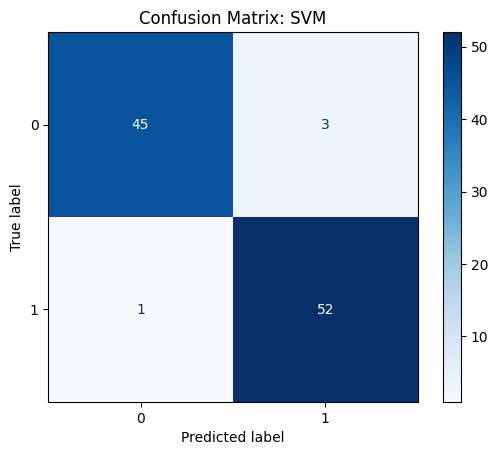

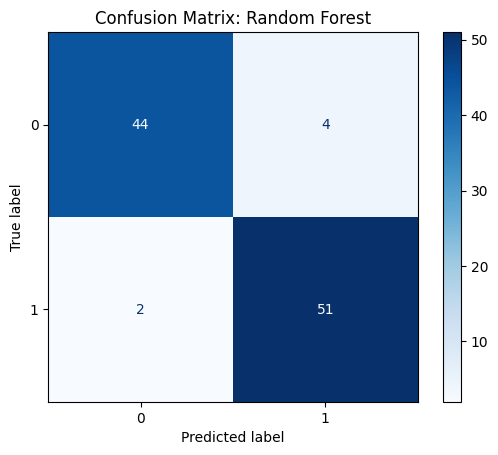

In [130]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

# Confusion matrix for SVM
plot_confusion_matrix(y_test, y_pred_svm, "Confusion Matrix: SVM")

# Confusion matrix for Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Confusion Matrix: Random Forest")

# Confusion matrix for KNN



In [131]:
import joblib

# Save the best models
joblib.dump(best_svm, "best_svm_model.pkl")
print("Saved SVM model as best_svm_model.pkl")

joblib.dump(best_rf, "best_rf_model.pkl")
print("Saved Random Forest model as best_rf_model.pkl")



Saved SVM model as best_svm_model.pkl
Saved Random Forest model as best_rf_model.pkl


In [132]:
cross=cross_val_score(best_svm,X,y)

In [133]:
cross.mean()

np.float64(0.9522376237623762)

In [134]:
cross=cross_val_score(best_rf,X,y)

In [135]:
cross.mean()

np.float64(0.9045346534653464)

In [136]:
cross=cross_val_score(best_lr,X,y)

In [137]:
cross.mean()

np.float64(0.9522574257425743)